# Assignment 1. Traffic volume prediction.
by Anvar Kurmukov,
updated by Bogdan Kirillov, Hekmat Taherinejad, Satyarth Mishra Sharma

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using a public dataset compiling weather information and traffic data continuously monitored in the Twin Cities, Minnesota from 2012 to 2018. The dataset page can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). We've slightly modified it so please download the dataset provided on Canvas.  

You need to download `Metro_Interstate_Traffic_Volume.csv` and place it in the same directory as this notebook.


In [2]:
import numpy as np
import pandas as pd

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `Metro_Interstate_Traffic_Volume.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

If you are using Google Colab, you can upload the file in the cell below. If you are NOT using Colab, set COLAB_P in the cell below to False.

In [3]:
COLAB_P = False
if COLAB_P:
    print("Upload your file, then read it with pd.read_csv()")
    from google.colab import files
    uploaded = files.upload()
    fn = list(uploaded.keys())[0]
    print("File is uploaded to ", fn)
else:
    print("Place your file to the same directory as the notebook, then read your file with pd.read_csv()")

Place your file to the same directory as the notebook, then read your file with pd.read_csv()


In [4]:
# Load the data
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
# Observe top 10 observations (int)
data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0
5,None,291.72,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 14:00:00,5181.0
6,None,293.17,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 15:00:00,5584.0
7,None,293.86,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 16:00:00,6015.0
8,None,294.14,0.0,0.0,20.0,Clouds,few clouds,2012-10-02 17:00:00,5791.0
9,None,293.10,0.0,0.0,20.0,Clouds,few clouds,2012-10-02 18:00:00,4770.0


In [6]:
# Observe last 10 observations (int)
data.tail(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48194,None,283.84,0.00,0.0,75.0,Rain,proximity shower rain,2018-09-30 15:00:00,4302.0
48195,None,283.84,0.00,0.0,75.0,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302.0
48196,None,284.38,0.00,0.0,75.0,Rain,light rain,2018-09-30 16:00:00,4283.0
48197,None,284.79,0.00,0.0,75.0,Clouds,broken clouds,2018-09-30 17:00:00,4132.0
48198,None,284.20,0.25,0.0,75.0,Rain,light rain,2018-09-30 18:00:00,3947.0
48199,None,283.45,0.00,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0
48200,None,282.76,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0
48201,None,282.73,0.00,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0
48202,None,282.09,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0
48203,None,282.12,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 23:00:00,954.0


In [7]:
# Print all the columns/features names (int)
column_names = data.columns
column_names
column_names[-1][-1] == ['a','e','i','o','u','A','E','I','O','U']


False

In [15]:
# Q1.1 How many columns end with a vowel?

v = ('a','e','i','o','u','A','E','I','O','U')
a1=sum(column_names.str.endswith(v))
   
        
# Q1.2 How many columns start with a vowel?
a2=sum(column_names.str.startswith(v))

# Q1.3 Which columns are associated with the condition of weather?

a3=column_names[column_names.str.contains('weather')]

# Q1.4 How many columns have `th` in their names?

a4=sum(column_names.str.contains('th'))

print(a1,a2,a3,'\n',a4)

2 0 Index(['weather_main', 'weather_description'], dtype='object') 
 2


In [9]:
# Print data size (int)
Data_size = data.shape

# Q2.1 How many observations are in the data?
a1=N_observations = Data_size[0]

# Q2.2 How many features are in the data?
a2=N_features = Data_size[1]
print(a1,a2)

48204 9


# 2. Basic data exploration

Lets do some basics:

`.count()` number of not NaN's in every column.
    
Is there any missing values in the data?     
Count number of unique values in every column .nunique().    
What does this tells you about the features, which are most likely categorical and which are most likely numerical?    
Use pandas `.describe()` to display basic statistic about the data.   
Use pandas `.value_counts()` to count number of unique values in a specific column.   
Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.    
Use pandas `.dtypes` field to display data types in columns. 
Hint You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`


In [11]:
# Display number of not NaN's in every column (int)
max_val = max(data.count())

# Q3.1 How many NA values are in the `clouds_all` column?
a1=print(N_observations - data['clouds_all'].count())

# Q3.2 How many NA values are in the `temp` column?
a2=print(N_observations - data['temp'].count())

# Q3.3 How many NA values are in the `rain_1h` column?
a3=print(N_observations - data['rain_1h'].count())

# Q3.4 How many NA values are in the `snow_1h` column?
a4=print(N_observations - data['snow_1h'].count())

# Q3.5 How many explicit NA values are in the `traffic_volume` column?
a5=print(data['traffic_volume'].isna().sum())

data.count()

3
1
1
0
5


holiday                48204
temp                   48203
rain_1h                48203
snow_1h                48204
clouds_all             48201
weather_main           48203
weather_description    48201
date_time              48204
traffic_volume         48199
dtype: int64

In [10]:
# Now drop rows with NaN with `.dropna`. Remeber to either reassign your dataframe or provide `inplace=True` argument.
data = data.dropna(subset = ['snow_1h'])
data = data.dropna(subset = ['rain_1h'])
data = data.dropna(subset = ['temp'])
data = data.dropna(subset = ['clouds_all'])
data.dropna (inplace = True)
data.count()

holiday                48190
temp                   48190
rain_1h                48190
snow_1h                48190
clouds_all             48190
weather_main           48190
weather_description    48190
date_time              48190
traffic_volume         48190
dtype: int64

In [11]:
# Display basic data statistics using .describe()
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48190.000000,48190.000000,48190.000000,48190.000000,48190.000000
mean,281.201366,0.334356,0.000222,49.369267,3259.859079
std,13.337406,44.795638,0.008169,39.016127,1986.972809
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1192.250000
50%,282.440000,0.000000,0.000000,64.000000,3380.000000
75%,291.800000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [12]:
# Count number of unique values in every column (int)
#num_values = (set(data))
#print(num_values)

# Q4.1 How many unique values are in the `clouds_all` column?
#data['clouds_all']
num_values = len(set(data['clouds_all']))
print(num_values)

# Q4.2 How many unique values are in the `weather_main` column?
#data['weather_main']
num_values = len(set(data['weather_main']))
print(num_values)

# Q4.3 How many unique values are in the `weather_description` column?
#data['weather_description']
num_values = len(set(data['weather_description']))
print(num_values)

# Q4.4 How many unique values are in the `snow_1h` column?
#data['snow_1h']
num_values = len(set(data['snow_1h']))
print(num_values)

# Q4.5 How many unique values are in the `rain_1h` column?
#data['rain_1h']
num_values = len(set(data['rain_1h']))
print(num_values)


60
11
38
12
372


In [13]:
# Count frequency of the values in different columns (list of ints in ascending order)
# You could select a column using same syntax as for selecting a key from a dictionary: `data[colname]`
# numpy's `unique` function can be useful for this task

# Q5.1 For every unique `weather_main` value give its number of occurences.

u,  indices, counts = np.unique(data.weather_main, return_counts=True, return_index=True)
print(u, '\n', counts,'\n',indices)
sum(counts)

# Q5.2 For every unique `weather_description` value give its number of occurences.
u,  indices, counts = np.unique(data.weather_description, return_counts=True, return_index=True)
print(u, '\n', counts,'\n',indices)
sum(counts)


['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm'] 
 [13384 15159  1821   912  1359  5950  5671    20  2876     4  1034] 
 [    5     0   179   296   271   268   164 16330   662  5958   528]
['SQUALLS' 'Sky is Clear' 'broken clouds' 'drizzle' 'few clouds' 'fog'
 'freezing rain' 'haze' 'heavy intensity drizzle' 'heavy intensity rain'
 'heavy snow' 'light intensity drizzle' 'light intensity shower rain'
 'light rain' 'light rain and snow' 'light shower snow' 'light snow'
 'mist' 'moderate rain' 'overcast clouds' 'proximity shower rain'
 'proximity thunderstorm' 'proximity thunderstorm with drizzle'
 'proximity thunderstorm with rain' 'scattered clouds' 'shower drizzle'
 'shower snow' 'sky is clear' 'sleet' 'smoke' 'snow' 'thunderstorm'
 'thunderstorm with drizzle' 'thunderstorm with heavy rain'
 'thunderstorm with light drizzle' 'thunderstorm with light rain'
 'thunderstorm with rain' 'very heavy rain'] 
 [    4  1726  4665   651  1955   912  

48190

In [14]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)
stat = data.describe()
stat

# Q6.1 What are the max, min, mean and the std of the `traffic_volume` column?
print (round(stat.traffic_volume['max'],3),round(stat.traffic_volume['min'],3),round(stat.traffic_volume['mean'],3),round(stat.traffic_volume['std'],3))

# Q6.2 What are the max, min, mean and the std of the `clouds_all` column?
print (round(stat.clouds_all['max'],3),round(stat.clouds_all['min'],3),round(stat.clouds_all['mean'],3),round(stat.clouds_all['std'],3))

# Q6.3 What are the max, min, mean and the std of the `temp` column?
print (round(stat.temp['max'],3),round(stat.temp['min'],3),round(stat.temp['mean'],3),round(stat.temp['std'],3))

# Q6.4 What are the max, min, mean and the std of the `rain_1h` column?
print (round(stat.rain_1h['max'],3),round(stat.rain_1h['min'],3),round(stat.rain_1h['mean'],3),round(stat.rain_1h['std'],3))

# Q6.5 What are the max, min, mean and the std of the `snow_1h` column?
print (round(stat.snow_1h['max'],3),round(stat.snow_1h['min'],3),round(stat.snow_1h['mean'],3),round(stat.snow_1h['std'],3))



7280.0 0.0 3259.859 1986.973
100.0 0.0 49.369 39.016
310.07 0.0 281.201 13.337
9831.3 0.0 0.334 44.796
0.51 0.0 0.0 0.008


In [15]:
# Display data types of all columns (int)
types = data.dtypes
print(types,'\n')

# Q7.1 How many columns have `object` data type?
print(sum(types=='object'),'\n')

# Q7.2 How many columns have `int64` data type?
print(sum(types=='int64'),'\n')

# Q7.3 How many columns have `float64` data type?
print(sum(types=='float64'),'\n')

# Q7.4 What are the columns with dtype == `float64`?
print(column_names[types == 'float64'],'\n')

# Q7.5 What are the columns with dtype == `int64`?
print(column_names[types == 'int64'],'\n')


holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all             float64
weather_main            object
weather_description     object
date_time               object
traffic_volume         float64
dtype: object 

4 

0 

5 

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume'], dtype='object') 

Index([], dtype='object') 



# 3. Data selection

In pandas.DataFrame you could select

  Row/s by position (integer number [0 .. number of rows - 1]) .iloc or by DataFrame.index .loc:   

```
  data.loc[0]  
  data.loc[5:10]  
  data.iloc[0]  
  data.iloc[5:10]   
```

Though, this is probably the worst way to manipulate rows.   
  Columns by name

```
  data[columname]
```

  Row/s and columns

```
  data.loc[10, columname]  
  data.iloc[10, columname]  
```

Using boolean mask

```
  mask = data[columname] > value  
  data[mask]  
```

You could combine multiple conditions using & or | (and, or)   

```
cond1 = data[columname1] > value1  
cond2 = data[columname2] > value2  
data[cond1 & cond2]  
```

Using queries .query():  

```
value = 5 
data.query("columname > value")  
```

You could combine multiple conditions using and, or  

```
data.query("(columname1 > value1) and (columname2 > value2)")
```

and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

Remember to use different quotation marks " or ' for columnname inside a query.


In [16]:
# Select rows by position (int) 


# Q8.1 What is the temperature of the time slot with index 777?
print(data.loc[777].temp)

# Q8.2 What is the weather description of the time slot with index 999?
print(data.loc[999].weather_description)

# Q8.3 How much is cloud coverage with index 1337?
print(data.loc[1337].clouds_all)

# Q8.4 What is the weather main of the time slot with index 314?
print(data.loc[314].weather_main)

# Q8.5 When was the time slot with index of 2718 observed?
print(data.loc[2718].date_time)


278.5
overcast clouds
1.0
Clouds
2013-01-06 14:00:00


In [18]:
# Select rows by index (int)

# Q9.1 What is the temperature of the time slot on index 1102?
print(data.temp.iloc[1102])

# Q9.2 What is the weather description of the time slot on index 5695?
print(data.weather_main.iloc[5695])

# Q9.3 How much is cloud coverage on the index 1045?
print(data.clouds_all.iloc[1045])

# Q9.4 What is the weather main of the time slot from index 252?
print(data.weather_main.iloc[252])

# Q9.5 When was the time slot with index of 38 captured?
print(data.date_time.iloc[38])

280.43
Clouds
20.0
Clear
2012-10-04 03:00:00


In [18]:
# Using mask or .query syntax select rows/columns (int)

# Q10.1 How many time slots have less than 270 temperature?
print(len(data.query("temp > 270")))

# Q10.2 When was the first "light intensity drizzle" in weather description captured?
print(data.query("weather_description == 'light intensity drizzle'").date_time.iloc[0].split(' ')[0])

# Q10.3 How many time slots have cloud coverage more than 75?
print(data.query("clouds_all > 75").shape[0])

# Q10.4 How many time slots are foggy? (weather_main = Fog)
print(data.query("weather_main == 'Fog'").shape[0])

# Q10.5 When was the last observed timeslot with weather_description "heavy snow"?
print(data.query("weather_description == 'heavy snow'").iloc[-1].date_time)

38869
2012-10-10
18036
912
2018-04-15 18:00:00


In [17]:
# Q11.1 What is the traffic volume of November 20th 2016, at 20:00?
print(data.query("date_time == '2016-11-20 20:00:00'").traffic_volume.iloc[0])

# Q11.2 What is the amount of rain in the 70th rainy time slot (non-zero rain) of the dataset?
print(data.query("rain_1h > 0").rain_1h.iloc[69])

# Q11.3 How much cloud coverage percentage were in sky on October 16th 2012 at 19:00?
print(data.query("date_time == '2012-10-16 19:00:00'").clouds_all.iloc[0])

# Q11.4 What is the `traffic_volume` of a thirty fourth sample with `clouds_all` == 90?
print(data.query("clouds_all == 90").traffic_volume.iloc[29])

# Q11.5 What is the "weather_description" in the 20th "weather_main" with Thunderstorm?
print(data.query("weather_main == 'Thunderstorm'").weather_description.iloc[19])

2070.0
0.25
68.0
5139.0
proximity thunderstorm


In [20]:
# Q12.1 What is the temperature of the tenth holiday?
print(data.query("holiday != 'None'").temp.iloc[9])

# Q12.2 What is the traffic volume for 99-th time slot with cloud coverage 75 percent?
print(data.query("clouds_all == 75").traffic_volume.iloc[98])

# Q12.3 How much is the temperature of the twelfth holiday?
print(data.query("holiday != 'None'").temp.iloc[11])

# Q12.4 How much is the temperature the 666-th time slot with weather_description 'proximity thunderstorm'?
print(data.query("weather_description == 'proximity thunderstorm'").temp.iloc[665])

# Q12.5 What is the temperature of 1337-th time slot with clear sky (clouds_all <= 20)?
print(data.query("clouds_all <= 20").temp.iloc[1336])


288.78
1437.0
275.44
288.6
276.63


# 4. Creating new columns

Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. Typically, you would compute something new based on existing data and save it in a new column. For example one might want to sum a number of existing columns:
```
data['sum'] = data[col1] + data[col2] + ...
```
Pandas also provides another powerfull tool: .apply, .map(), .applymap() methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas . They allow you to apply some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of sum using .apply():
```
data['sum'] = data[[col1, col2, col3]].apply(sum, axis=1)
```
you are not restricted to existent functions, .apply() accepts any function (including lambda functions):
```
data['sum'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total

data['sum'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has axis parameter axis=0 refers to rows, axis=1 refers to columns.

Warning. You should never use for loops to sum numerical elements from the container.

In [21]:
s = pd.Series([1])
s.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2    1.0
0.4    1.0
0.6    1.0
0.8    1.0
1.0    1.0
dtype: float64

In [22]:
# Create new columns using the old ones (new column in your DataFrame)
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Q13.1 Create a `temp_in_celcius` column from the existing `temp` (kelvin) using any method above
data['temp_in_celcius'] = data['temp'] - 273

# Q13.2 Create a new bool column `hot` which indicates whether the time slot was hot (temp > 300)
data['hot'] = data['temp'] > 300;

# Q13.3 Create a new bool column `rainy_and_cloudy` which indicates whether it was rainy (>0.1) AND cloudy (>50)
data['rainy_and_cloudy'] = (data['rain_1h'] > 0.4) & (data['clouds_all'] > 50);

# Q13.4 Create a new bool column `is_holiday` which indicates whether the day of the time slot falls on any holiday
data['is_holiday'] = data['holiday'] != 'None';

# Q13.5 Create a new column `traffic_cat` by splitting a `traffic_volume` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
temp = data.traffic_volume
data['traffic_cat'] = 1 + sum([data['traffic_volume'] > temp.quantile(0.2), data['traffic_volume'] > temp.quantile(0.4),data['traffic_volume'] > temp.quantile(0.6),data['traffic_volume'] > temp.quantile(0.8)])

In [23]:
# Using mask or .query syntax select rows/columns (int).
# For working with dates, define helper functions that operate on the date_time string.

def day(date):
    yymmdd = date.split(' ')[0];
    return yymmdd.split('-')[2];

def month(date):
    yymmdd = date.split(' ')[0];
    return yymmdd.split('-')[1];

def year(date):
    yymmdd = date.split(' ')[0];
    return yymmdd.split('-')[0];

a1=a2=a3=a4=a5=0;

# Q14.1 How many cloudy time slots were captured in autumn 2016? Including both start and end day.
cond1 = (data.date_time.apply(year)) == '2016';
cond2 = ((data.date_time.apply(month)) > '08') & (data.date_time.apply(month) < '12');
a1 = data[cond1 & cond2].query("weather_main == 'Clouds'").shape[0]


# Q14.2 How many rainy time slots that were captured in the fall, with traffic volume more than 2000?
cond1 = (data.date_time.apply(year)) > '2000';
cond2 = ((data.date_time.apply(month)) > '08') & (data.date_time.apply(month) < '12');
a2 = data[cond1 & cond2].query("weather_main == 'Rain'").shape[0]


# Q14.3 How many time slots that are warmer than 270, have weather main "Clouds"?
a3 = data.query("(weather_main == 'Clouds') and (temp > 270)").shape[0]

# Q14.4 What is the minimum traffic volume of time slots captured on March 8th (all years), that was warmer than 290?
cond1 = (data.date_time.apply(month)) == '03';
cond2 = (data.date_time.apply(day)) == '08';
a4 = min(data[cond1 & cond2].query("temp > 290").traffic_volume)

# Q14.5 How much is the maximum traffic volume for the time slots were captured in June 2017 and has clear sky (weather_main)?
cond1 = (data.date_time.apply(year)) == '2017';
cond2 = ((data.date_time.apply(month)) == '06');
a5 = max(data[cond1 & cond2].query("weather_main == 'Clear'").traffic_volume)

print(a1,a2,a3,a4,a5)

643 1431 12137 4780.0 6673.0


In [24]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)

a1=a2=a3=a4=a5=0;

# Q15.1 What was the average temperature of time slots with main weather "Haze"?
data_temp = data.query("weather_main == 'Haze'");
a1 = data_temp.describe().temp[1]

# Q15.2 What was the traffic volume of the coldest time slot of the year 2016?
cond1 = data.temp == min(data[(data.date_time.apply(year)) == '2016'].temp);
cond2 = (data.date_time.apply(year)) == '2016';
data_temp = data [cond1 & cond2];
a2=data_temp.traffic_volume.iloc[0]

# Q15.3 What was the traffic volume of the highest amount of snow in one hour?
cond = (data.snow_1h == max(data.snow_1h));
data_temp = data[cond];
a3 = data_temp.traffic_volume.iloc[1]


# Q15.4 What is the median of temperatures captured in April 2017?
cond1 = (data.date_time.apply(year)) == '2017';
cond2 = ((data.date_time.apply(month)) == '04');
data_temp = data[cond1 & cond2].sort_values(by=['temp'])
n = data_temp.describe().temp[0]
a4 = data_temp.temp.iloc[int((n-1)/2)]

# Q15.5 What is the maximum temperature of time slots with clear sky?
data_temp = data.query("weather_main == 'Clear'");
a5 = max(data_temp.temp)
print(a1,a2,a3,a4,a5)

275.8185808823521 1462.0 5167.0 282.01 308.43


In [25]:
# Using mask or .query syntax select rows/columns (float)

a1=a2=a3=a4=a5=0;

# Q16.1 What is the average temperature in celcius of the time slots with rainy_and_coudy=True?
data_temp = data[data.rainy_and_cloudy == True]
a1 = data_temp.temp_in_celcius.mean()

# Q16.2 What is the average traffic volume on holidays?
data_temp = data[data.is_holiday == True]
a2 = data_temp.traffic_volume.mean()

# Q16.3 What is the average traffic volume on non-holidays?
data_temp = data[data.is_holiday == False]
a3 = data_temp.traffic_volume.mean()

# Q16.4 What is the average traffic volume in the highest quantile?
data_temp = data[data.traffic_cat == 5]
a4 = data_temp.traffic_volume.mean()

# Q16.5 What is the average traffic volume in the lowest quantile?
data_temp = data[data.traffic_cat == 1]
a5 = data_temp.traffic_volume.mean()


print(a1,a2,a3,a4,a5)

14.7746352166758 865.4426229508197 3262.9165108645975 5869.859336099585 485.5536195809998


# 5. Basic date processing

You figure out that column date is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method to_datetime() to convert the date to a good format.
- Extract year, month, day and weekday from your new date column. Save them to separate columns.
- How many columns has your data now?
- Drop column date, remember to set inplace parameter to True.

Hint: for datetime formatted date you could extract the year as follow:
```
data.date.dt.year
```
Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like black friday.

Learn how to work with date in Python!


In [26]:
# Create new columns based on `Captured` column

# Q17.1 Convert date to datetime format
Datas = pd.to_datetime(data.date_time)

# Q17.2 Extract and store `year`
data['year'] = Datas.dt.year

# Q17.3 Extract and store `month`
data['month'] = Datas.dt.month

# Q17.4 Extract and store `day`
data['day'] = Datas.dt.day

# Q17.5 Extract and store `weekday` (Monday - 0, Sunday - 6)
data['weekday'] = Datas.dt.weekday

# Q17.6 Extract and store `hour`
data['hour'] = Datas.dt.hour

data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_in_celcius,hot,rainy_and_cloudy,is_holiday,traffic_cat,year,month,day,weekday,hour
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,15.28,False,False,False,5,2012,10,2,1,9
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,16.36,False,False,False,4,2012,10,2,1,10
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,16.58,False,False,False,4,2012,10,2,1,11
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,17.13,False,False,False,4,2012,10,2,1,12
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,18.14,False,False,False,4,2012,10,2,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0,10.45,False,False,False,3,2018,9,30,6,19
48200,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0,9.76,False,False,False,3,2018,9,30,6,20
48201,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0,9.73,False,False,False,2,2018,9,30,6,21
48202,None,282.09,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0,9.09,False,False,False,2,2018,9,30,6,22


In [27]:
# Find some date related information from the data (int)

a1=a2=a3=a4=a5=0;

# Q18.1 What is the weekday with the highest traffic volume?
a1 = data[data.traffic_volume == max(data.traffic_volume)].weekday.iloc[0]

# Q18.2 What is the weekday with the lowest traffic volume?
a2 = data[data.traffic_volume == min(data.traffic_volume)].weekday.iloc[0]

# Q18.3 What is the average traffic volume during months of September?
a3 = data[data.month == 9].traffic_volume.mean()

# Q18.4 What is the average traffic volume in the time period between 15-19 hours
a4 = data[(data.hour < 20) & (data.hour > 14)].traffic_volume.mean()


# Q18.5 What is the average traffic volume on World Bicycle Day (June 3)?
a5 = data[(data.day == 3) & (data.month == 6)].traffic_volume.mean()

print(a1,a2,a3,a4,a5)

3 5 3303.049334377447 4749.20120395878 3445.976


# 6. Groupby

from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric.

Instead of computing average traffic volume with for each month you could compute average traffic volumes for every month in a single command:
```
data.groupby('month')['traffic_volume'].mean()
```
You could also make multi-column groups:
```
data.groupby(['weekday','month'])['traffic_volume'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','month'])['traffic_volume'].agg([min, max])
```
instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['weekday','month'])['traffic_volume'].apply(lambda x: np.quantile(x, .5))
```
and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['month'])['traffic_volume'].median()
data['gp_feature'] = data['month'].map(gp)
```
Now, if some timeslot has month == 2, its gp_feature will be equal to the median traffic volume amongst all observations in February

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [28]:
# Create some groupby features

# Q19.1 `traffic_by_year` groupby `year` and compute median traffic volume.
#data.groupby('year')['traffic_volume'].median()

# Q19.2 `traffic_by_weekday` groupby `weekday` and compute median traffic volume.
#data.groupby('weekday')['traffic_volume'].median()

# Q19.3 `temperature_by_traffic` groupby `traffic_cat` and compute average temperature in celsius.
#data.groupby('traffic_cat')['temp_in_celcius'].mean()

# 7. Building a regression model

- You do not need to normalize data for tree models, and for linear/knn models this step is essential.
- Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.
- You may create or drop any features you want - try to only keep features which you think will be relevant to the prediction of traffic volume.



In [29]:
temporary=data

In [30]:
data=temporary
data.dropna(inplace = True)

# Q20 Separate your data into inputs and targets, keeping only relevant inputs. Drop any features computed from the output eg. `traffic_cat`
y = data["traffic_volume"].values

data['rainfall'] = data.snow_1h + data.rain_1h;
cat_colummns = ['weather_main', 'month', 'hour']
dummy_columns = pd.get_dummies(data[cat_colummns])
good_columns = ['temp', 'rainfall','clouds_all']
data = pd.concat((data[good_columns],dummy_columns),axis = 1)

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse=False)

hour_columns = ['hour']
redo_hours = pd.DataFrame(ohe.fit_transform(data[hour_columns]))
#month_columns = ['month']
#redo_months = pd.DataFrame(ohe.fit_transform(data[month_columns]))
#redo = pd.concat([redo_months,redo_hours],axis=1)

X = pd.concat([data,redo_hours],axis = 1)

X.dropna(inplace = True)
#print (X)

In [31]:
columns=X.columns
print(columns)

Index([                     'temp',                  'rainfall',
                      'clouds_all',                     'month',
                            'hour',        'weather_main_Clear',
             'weather_main_Clouds',      'weather_main_Drizzle',
                'weather_main_Fog',         'weather_main_Haze',
               'weather_main_Mist',         'weather_main_Rain',
              'weather_main_Smoke',         'weather_main_Snow',
             'weather_main_Squall', 'weather_main_Thunderstorm',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                                 8,                           9,
                                10,                          11,
                                12,                          13,
                         

Now it's time to split our data into train and test sets. Generally a random split is used, but one needs to be very careful with time series data - we need to make sure train and test data don't contain mixed adjacent time slots. In general with time series, it is recommended not to predict values from the past using input information from the future (although the applicability of this rule in our case is debatable), so we'll use sklearn's [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) class here. TimeSeriesSplit splits data into a number of folds, then only provides data from past folds to train a model tested on the currently considered fold. So if we split our data into five parts, we'll get four folds:

1. Train on [0], test on [1]
2. Train on [0,1], test on [2]
3. Train on [0, 1, 2], test on [3]
4. Train on [0, 1, 2, 3], test on [4]

For the following tasks, you are required to use train and test indices from the last fold provided by TimeSeriesSplit with `n_splits` = 5.

In [32]:
# Q21 Split your data into train and test parts.
# How many records (rows) do you have in train and test tables? (list of int)?
# Use sklearn.model_selection.TimeSeriesSplit with n_splits=5



from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [33]:
# Create a predictive regression model of a traffic volume.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


scaler = MinMaxScaler()
num_features=columns;
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

(0.30281190979421263, 6.773126252329567e-170)

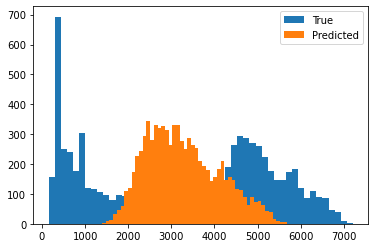

In [34]:
# Q22.1 Use linear regression with l2 regularization (Ridge regression)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred1, bins=50, label='Predicted');
plt.legend();


pearsonr(y_test, y_pred1)

(0.7249452631478249, 0.0)

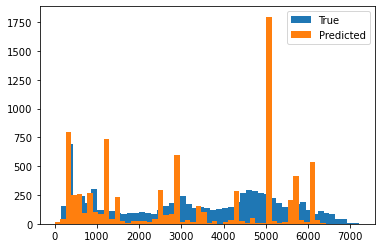

In [35]:
# Q22.2 Use decision tree regression

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=20)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred2, bins=50, label='Predicted');

plt.legend();


pearsonr(y_test, y_pred2)

(0.7828141002439796, 0.0)

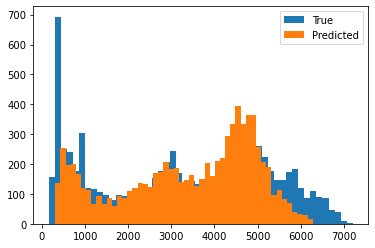

In [36]:
# Q22.3 Use k nearest neighbours regression
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train, y_train)
y_pred3 = reg.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred3, bins=50, label='Predicted');
plt.legend();

pearsonr(y_test, y_pred3)

In [37]:
# Use grid search to select optimal hyperparamters of your models. 

# Q23.1 Alpha for a ridge regression
rmse_val1 = {}
pearsonr_val1 = {}
for alpha1 in np.logspace(-10,1,1):
    reg = Ridge(alpha=alpha1)
    reg.fit(X_train, y_train)
    y_pred1 = reg.predict(X_test)
    rmse_val1[alpha1] = (mse(y_pred1, y_test))
    pearsonr_val1[alpha1] = pearsonr(y_test, y_pred1)
    
print(min(rmse_val1.items(), key=lambda x: x[1]))
print(min(pearsonr_val1.items(), key=lambda x: x[1]))


# Q23.2 Depth for the tree
rmse_val2 = {}
pearsonr_val2 = {}
for depth in range(3,20,1):
    clf=DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train,y_train)
    y_pred2 = clf.predict(X_test)
    rmse_val2[depth] = (mse(y_pred2, y_test))
    pearsonr_val2[depth] = pearsonr(y_test, y_pred2)
    
print(min(rmse_val2.items(), key=lambda x: x[1]))
print(min(pearsonr_val2.items(), key=lambda x: x[1]))

# Q23.3 Number of neighbours for the knn
rmse_val3 = {}
pearsonr_val3 = {}
for neigh in range(10,20,1):
    reg = KNeighborsRegressor(n_neighbors=neigh)
    reg.fit(X_train, y_train)
    y_pred3 = reg.predict(X_test)
    rmse_val3[neigh] = (mse(y_pred3, y_test))
    pearsonr_val3[neigh] = pearsonr(y_test, y_pred3)
    
print(min(rmse_val3.items(), key=lambda x: x[1]))
print(min(pearsonr_val3.items(), key=lambda x: x[1]))


(1e-10, 3585780.979694273)
(1e-10, (0.3028579738144704, 5.986638579840573e-170))
(13, 1394445.0287707062)
(19, (0.7558222486220632, 0.0))
(10, 1520474.389204135)
(19, (0.7562093365560153, 0.0))


(0.3028579738144704, 5.986638579840573e-170)
(0.8464768450592515, 0.0)
(0.7828141002439796, 0.0)


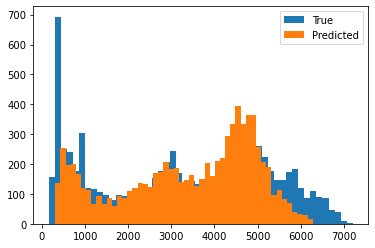

In [38]:
# Compute train and test mean squared error for your best models (list of float).

# Q24.1 Train, test MSE using linear regression with l2 regularization
reg = Ridge(alpha=min(rmse_val1.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred1, bins=50, label='Predicted');
plt.legend();

print(pearsonr(y_test, y_pred1))


# Q24.2 Train, test MSE using decision tree regression
clf=DecisionTreeClassifier(max_depth=min(rmse_val2.items(), key=lambda x: x[1])[0])
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred2, bins=50, label='Predicted');

plt.legend();

print(pearsonr(y_test, y_pred2))


# Q24.3 Train, test MSE using k nearest neighbours regression
reg = KNeighborsRegressor(n_neighbors=min(rmse_val3.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)
y_pred3 = reg.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred3, bins=50, label='Predicted');
plt.legend();

print(pearsonr(y_test, y_pred3))

(0.3028579738144704, 5.986638579840573e-170)
(0.7530985341691627, 0.0)
(0.7562093365560153, 0.0)


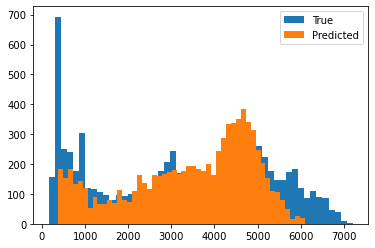

In [39]:
# Compute train and test R^2 for your best models (list of float).

# Q25.1 Train, test R^2 using linear regression with l2 regularization
reg = Ridge(alpha=min(pearsonr_val1.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred1, bins=50, label='Predicted');
plt.legend();

print(pearsonr(y_test, y_pred1))

# Q25.2 Train, test R^2 using decision tree regression
clf=DecisionTreeClassifier(max_depth=min(pearsonr_val2.items(), key=lambda x: x[1])[0])
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred2, bins=50, label='Predicted');

plt.legend();

print(pearsonr(y_test, y_pred2))

# Q25.3 Train, test R^2 using k nearest neighbours regression
knn = KNeighborsRegressor(n_neighbors=min(pearsonr_val3.items(), key=lambda x: x[1])[0])
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

%matplotlib inline
plt.hist(y_test, bins=50, label='True');
plt.hist(y_pred3, bins=50, label='Predicted');
plt.legend();

print(pearsonr(y_test, y_pred3))


In [40]:
# Q26 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).
d = {'col1': columns, 'col2': abs(reg.coef_)}
df = pd.DataFrame(data=d)
df = df.sort_values(by=['col2', 'col1'])
df

,col1,col2
10,weather_main_Mist,21.772466
25,9,23.666401
21,5,30.312165
16,0,42.900350
7,weather_main_Drizzle,52.456533
11,weather_main_Rain,52.885928
34,18,87.769397
8,weather_main_Fog,95.435497
36,20,107.720573
27,11,107.999781


# Make sure your .ipynb is linearly executable     
# Kernel -> Restart & Run All -> No ERROR cells